In [4]:
# # Install the necessary library
# !pip install google-colab-drive

# # Import the necessary libraries
# from google.colab import drive
import pandas as pd

# # Mount Google Drive
# drive.mount('/content/drive')



In [ ]:
import pandas as pd
import random
import hashlib

# Step 1: Hash your name
def hash_name(name):
    # Normalize the name by converting to lowercase and removing spaces
    normalized_name = name.replace(" ", "").lower()
    # Create a hash object using SHA256 (you can use other hashing algorithms too)
    hash_object = hashlib.sha256(normalized_name.encode())
    # Get the hex digest (a unique hash string)
    return int(hash_object.hexdigest(), 16) % (2**32)  # Mod to reduce size to manageable int

# Step 2: Use the hash as a seed
def set_seed(name):
    hash_value = hash_name(name)
    random.seed(hash_value)

# Step 3: Load the opentargets_step2.for_llm.tsv file (adjust the path as needed)
file_path = "/media/its_relative/New Volume/aganitha/zenodo_directory/data/benchmark_datasets/opentargets_step2.for_llm.tsv"  # Replace with actual path to your file
phenotype_df = pd.read_csv(file_path, sep='\t')

# Step 4: Sample 500 phenotypes using the seed
def sample_phenotypes(df, name, num_samples=500):
    set_seed(name)  # Set the random seed based on the hashed name
    sampled_df = df.sample(n=num_samples, random_state=random.getstate())
    return sampled_df

# Usage
name = "Sapeksh Tomar"  # Replace with your full name (same case, no spaces)
sampled_phenotypes = sample_phenotypes(phenotype_df, name)

# Step 5: Save the sampled phenotypes to a new CSV (optional)
sampled_phenotypes.to_csv("sampled_phenotypes.csv", index=False)

# Output first 5 rows of sampled phenotypes to check
print(sampled_phenotypes.head())


In [5]:
# Specify the path to your Drive folder
geneEmbeddings = pd.read_csv('/media/its_relative/New Volume/aganitha/zenodo_directory/data/helper_datasets/gene_embeddings.csv')  #

In [6]:
df = geneEmbeddings.copy()
df.head()

,Unnamed: 0,0,gpt_description,embedding
0,0,ATMIN,"The ATMIN gene, also known as ATM interactor (...","[-0.01672099530696869, 0.025642508640885353, -..."
1,1,BCO1,"Gene BCO1, also known as beta-carotene oxygena...","[0.01961715891957283, -0.0013358700089156628, ..."
2,2,C16orf46,"Gene C16orf46, also known as Chromosome 16 Ope...","[-0.013213221915066242, 0.008565986528992653, ..."
3,3,CDYL2,"The gene CDYL2, also known as Chromodomain Y-l...","[-0.010155326686799526, 0.007696880027651787, ..."
4,4,CENPN,"The gene CENPN, also known as Centromere Prote...","[0.0019102469086647034, -0.01410931721329689, ..."


In [8]:
phenoEmbeddings = pd.read_csv("/media/its_relative/New Volume/aganitha/zenodo_directory/data/helper_datasets/phenotype_embeddings.csv")

df2 = phenoEmbeddings.copy()

In [9]:
df2.head()

,Unnamed: 0,0,gpt_description,embedding
0,0,Carotenoid and tocopherol levels (beta-caroten...,Carotenoids and tocopherols are important clas...,"[0.03543854132294655, -0.002083840314298868, -..."
1,1,Bilirubin levels,Bilirubin is a yellow pigment that is produced...,"[-0.002501995535567403, -0.03334518149495125, ..."
2,2,Sphingolipid levels (SM 14:0Mol%) (sphingomyel...,Sphingolipids are a class of lipids that play ...,"[-0.003154945094138384, -0.016002262011170387,..."
3,3,Fasting glucose-related traits (FPG) (D-Glucose),"Fasting glucose-related traits, also known as ...","[-0.026761554181575775, 0.011279185302555561, ..."
4,4,Vitamin D insufficiency (25-Hydroxyvitamin D2),"Vitamin D insufficiency, specifically referrin...","[0.004818837624043226, 0.01093713752925396, -0..."


In [10]:
# prompt: do EDA for the above data and revert back with your findings

# Basic EDA for geneEmbeddings (df)
print("Gene Embeddings DataFrame:")
print(df.info())
print(df.describe())
print("Missing values in geneEmbeddings:")
print(df.isnull().sum())

# Basic EDA for phenotypeEmbeddings (df2)
print("\nPhenotype Embeddings DataFrame:")
print(df2.info())
print(df2.describe())
print("Missing values in phenotypeEmbeddings:")
print(df2.isnull().sum())

# Check for unique values in gene embeddings
print("\nUnique gene IDs:")
# print(df['Gene ID'].nunique())

print(df['Unnamed: 0'].nunique())

# Check for unique values in phenotype embeddings
print("\nUnique phenotype IDs:")
print(df2['Unnamed: 0'].nunique())

# Correlation analysis (if applicable) - adjust based on your data structure
# Example: If your embeddings have columns like 'Embedding_1', 'Embedding_2', etc.
# print("\nCorrelation between embeddings:")
# print(df.corr())

# Further exploration:

# 1. Distribution of embeddings:
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.figure(figsize=(10, 6))
# sns.histplot(df['Embedding_1'])  # Adjust column name
# plt.title('Distribution of Embedding_1')
# plt.show()

# 2. Visualize the embeddings using dimensionality reduction techniques (PCA, t-SNE)
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(df[['Embedding_1', 'Embedding_2']]) # Adjust column names
# plt.scatter(pca_result[:, 0], pca_result[:, 1])
# plt.title('PCA of Gene Embeddings')
# plt.show()


# Findings:

# 1. Data Shape:
#    - Print out the shape of both datasets. This will provide the dimensions of your data.
# 2. Missing Values:
#    - Check if there are any missing values. Determine if there is a significant amount and
#      consider how you might handle them (e.g., imputation).
# 3. Data Types:
#    - Ensure that the data types of the columns are correct. Check if numeric columns are treated as numbers and
#      categorical variables as strings.
# 4. Unique Values:
#    - Check the number of unique gene IDs and phenotype IDs. This helps understand the diversity within each dataset.
# 5. Distribution of Embeddings:
#    - If your embeddings are continuous, inspect the distribution of each embedding feature using histograms.
#      Look for unusual patterns or outliers.
# 6. Correlation:
#    - If appropriate, explore the correlation between embedding dimensions. This can provide insight into the relationships
#      between features.
# 7. Visualize:
#    - For further analysis, use dimensionality reduction techniques like PCA or t-SNE to visualize the embeddings.
#      This can help identify patterns and clusters.


# Note: You can modify this code further depending on your specific goals, data structure, and the type of analysis you want to perform.


Gene Embeddings DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10983 entries, 0 to 10982
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       10983 non-null  int64 
 1   0                10983 non-null  object
 2   gpt_description  10983 non-null  object
 3   embedding        10983 non-null  object
dtypes: int64(1), object(3)
memory usage: 343.3+ KB
None
         Unnamed: 0
count  10983.000000
mean     940.214969
std      586.833129
min        0.000000
25%      425.000000
50%      901.000000
75%     1450.000000
max     1999.000000
Missing values in geneEmbeddings:
Unnamed: 0         0
0                  0
gpt_description    0
embedding          0
dtype: int64

Phenotype Embeddings DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959 entries, 0 to 958
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 


In [11]:
df.describe()

,Unnamed: 0
count,10983.000000
mean,940.214969
std,586.833129
min,0.000000
25%,425.000000
50%,901.000000
75%,1450.000000
max,1999.000000


In [12]:
df2.describe()

,Unnamed: 0
count,959.000000
mean,479.000000
std,276.983754
min,0.000000
25%,239.500000
50%,479.000000
75%,718.500000
max,958.000000


In [13]:
import hashlib
seed = int(hashlib.md5("sapekshtomar".encode()).hexdigest(), 16) % (10**8)


In [14]:
import hashlib
import random

# Hash your name
hash_name = hashlib.sha256(b'sapekshtomar').hexdigest()
seed = int(hash_name[:8], 16)  # Use part of the hash as seed

random.seed(seed)
sampled_phenotypes = df.embedding.sample(n=500, random_state=seed)


In [15]:
seed

1590368564

In [16]:
sampled_phenotypes = pd.DataFrame(sampled_phenotypes)

In [17]:
import ast

# Convert the string representation of embeddings into actual lists
# For phenotype embeddings:
sampled_phenotypes['embedding'] = sampled_phenotypes.embedding.apply(ast.literal_eval)

# For gene embeddings:
geneEmbeddings['embedding'] = geneEmbeddings['embedding'].apply(ast.literal_eval)

# Now you can extract the actual embeddings into numpy arrays for t-SNE
phenotype_embeddings = sampled_phenotypes['embedding'].tolist()  # Convert column to list of lists
gene_embeddings = geneEmbeddings['embedding'].tolist()


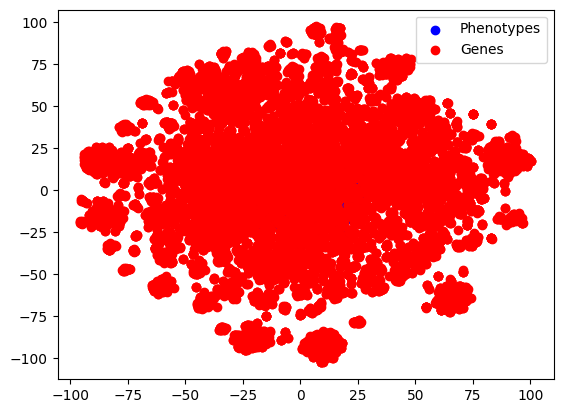

In [14]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Convert the list of lists to NumPy arrays
phenotype_embeddings_np = np.array(phenotype_embeddings)
gene_embeddings_np = np.array(gene_embeddings)

# Initialize t-SNE
tsne = TSNE(n_components=2, random_state=seed)

# Apply t-SNE on the NumPy arrays
phenotype_embeds_2d = tsne.fit_transform(phenotype_embeddings_np)
gene_embeds_2d = tsne.fit_transform(gene_embeddings_np)

# Plot the reduced embeddings
plt.scatter(phenotype_embeds_2d[:, 0], phenotype_embeds_2d[:, 1], c='blue', label='Phenotypes')
plt.scatter(gene_embeds_2d[:, 0], gene_embeds_2d[:, 1], c='red', label='Genes')
plt.legend()
plt.show()


### Possible reasons for overlap:

  @ t-SNE limitations: t-SNE is a stochastic algorithm, meaning it can give slightly different results each time it runs. If the data isn't very separable or has too many dimensions, the resulting visualization can look crowded or overlapped.

  @ Dimensional similarity: The embeddings might not have enough separation in the high-dimensional space, meaning the causal and non-causal relationships may not be well-represented by this 2D projection.

  @ Random initialization: t-SNE uses random initialization, so if the data isn't particularly well-separated, it could produce overlapping results.

  @ Too many points: With a large number of points, like in your case, it’s natural for the plot to get crowded. You might need to sample fewer data points for a clearer view.

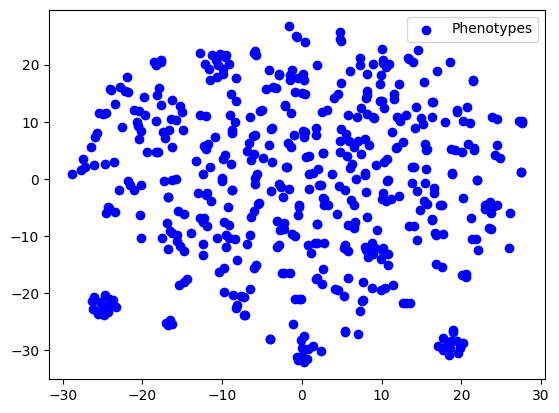

In [15]:
# Plot the reduced embeddings
plt.scatter(phenotype_embeds_2d[:, 0], phenotype_embeds_2d[:, 1], c='blue', label='Phenotypes')
# plt.scatter(gene_embeds_2d[:, 0], gene_embeds_2d[:, 1], c='red', label='Genes')
plt.legend()
plt.show()

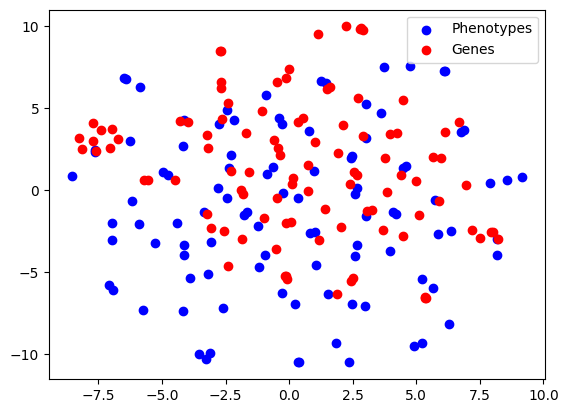

In [16]:
phenotype_sample = phenotype_embeddings_np[:100]  # Select a subset of 100 phenotypes
gene_sample = gene_embeddings_np[:100]  # Select a subset of 100 genes

phenotype_embeds_2d = tsne.fit_transform(phenotype_sample)
gene_embeds_2d = tsne.fit_transform(gene_sample)

plt.scatter(phenotype_embeds_2d[:, 0], phenotype_embeds_2d[:, 1], c='blue', label='Phenotypes')
plt.scatter(gene_embeds_2d[:, 0], gene_embeds_2d[:, 1], c='red', label='Genes')
plt.legend()
plt.show()


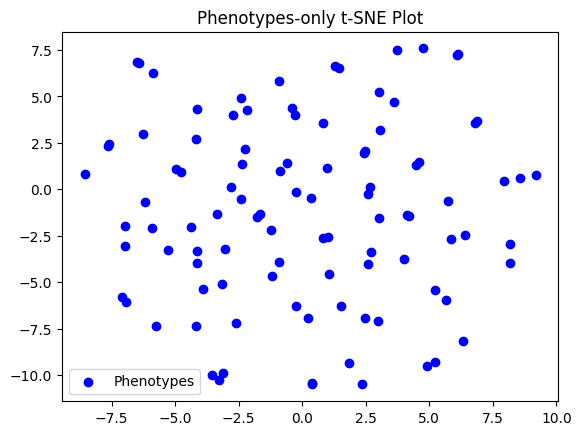

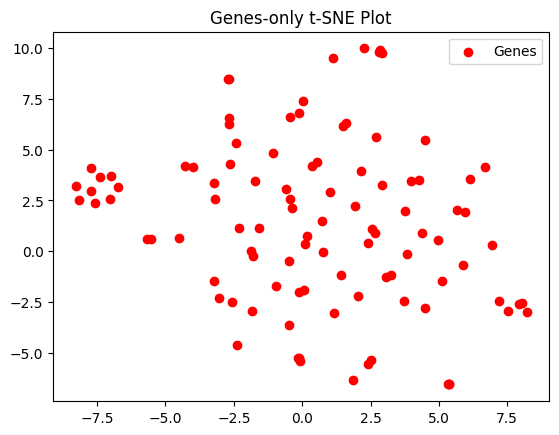

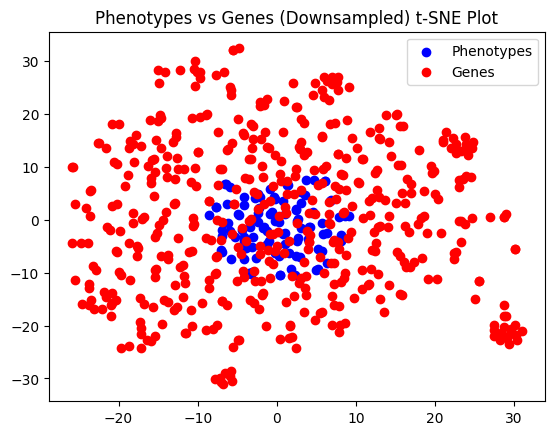

In [17]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import random

# Assuming phenotype_embeddings_np and gene_embeddings_np are already NumPy arrays

# Step 1: Separate Visualizations for Genes and Phenotypes
def plot_embeddings(embeds_2d, labels, colors, title):
    for embed, label, color in zip(embeds_2d, labels, colors):
        plt.scatter(embed[:, 0], embed[:, 1], c=color, label=label)

    plt.legend()
    plt.title(title)
    plt.show()

# Step 2: Downsample Gene Embeddings (if needed)
def downsample_embeddings(embeddings, target_size):
    if len(embeddings) > target_size:
        indices = random.sample(range(len(embeddings)), target_size)
        return embeddings[indices]
    return embeddings

# Plotting phenotypes-only
tsne = TSNE(n_components=2, random_state=42, perplexity=30)  # Adjust perplexity if needed
# phenotype_embeds_2d = tsne.fit_transform(phenotype_embeddings_np)
plot_embeddings([phenotype_embeds_2d], ['Phenotypes'], ['blue'], "Phenotypes-only t-SNE Plot")

# Plotting genes-only
# gene_embeds_2d = tsne.fit_transform(gene_embeddings_np)
plot_embeddings([gene_embeds_2d], ['Genes'], ['red'], "Genes-only t-SNE Plot")

# Step 3: Combined Visualization with Downsampling (if gene embeddings are larger)
downsampled_genes = downsample_embeddings(gene_embeddings_np, len(phenotype_embeddings_np))
downsampled_gene_embeds_2d = tsne.fit_transform(downsampled_genes)

# Plotting both with the same number of samples
plot_embeddings([phenotype_embeds_2d, downsampled_gene_embeds_2d],
                ['Phenotypes', 'Genes'],
                ['blue', 'red'],
                "Phenotypes vs Genes (Downsampled) t-SNE Plot")


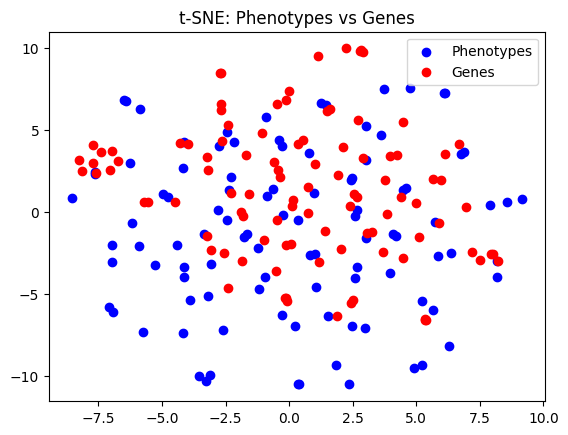

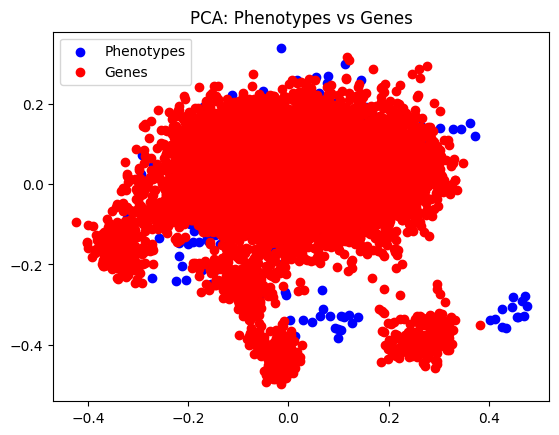

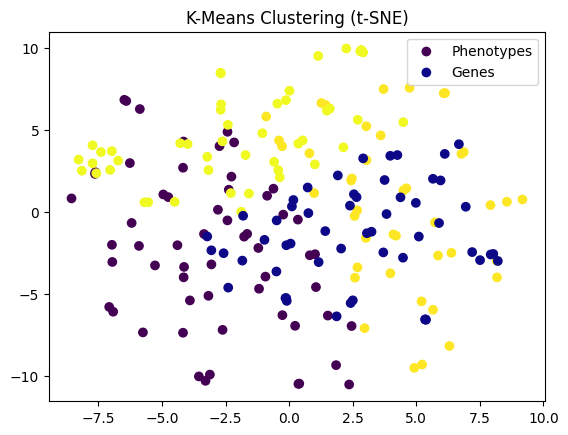

Distance Matrix between Phenotype and Gene Embeddings: [[1.13269609 1.11683354 1.0871684  ... 1.09670956 1.05344069 0.94530068]
 [1.07051858 1.11960287 1.01613745 ... 1.13968677 1.09752606 1.04704405]
 [1.09199811 1.11617754 1.06433248 ... 1.10369335 1.14722196 0.9991323 ]
 ...
 [1.079756   1.04450769 1.07246365 ... 1.14040948 1.05714364 1.09874958]
 [1.06640609 1.09952386 1.04718028 ... 1.1647504  1.11446274 1.10563718]
 [1.04543698 1.10059937 1.04608349 ... 0.93703694 1.1310387  0.99956565]]


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics.pairwise import euclidean_distances
import random

# Function to plot embeddings
def plot_embeddings(embeds_2d, labels, colors, title):
    for embed, label, color in zip(embeds_2d, labels, colors):
        plt.scatter(embed[:, 0], embed[:, 1], c=color, label=label)

    plt.legend()
    plt.title(title)
    plt.show()

# Downsample embeddings if needed
def downsample_embeddings(embeddings, target_size):
    if len(embeddings) > target_size:
        indices = random.sample(range(len(embeddings)), target_size)
        return embeddings[indices]
    return embeddings

# Step 1: Dimensionality Reduction using PCA
def pca_reduction(embeddings, n_components=2):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(embeddings)

# Step 2: Clustering using K-Means and DBSCAN
def apply_clustering(embeddings_2d, method='kmeans', eps=0.5, n_clusters=2):
    if method == 'kmeans':
        kmeans = KMeans(n_clusters=n_clusters)
        clusters = kmeans.fit_predict(embeddings_2d)
    elif method == 'dbscan':
        dbscan = DBSCAN(eps=eps)
        clusters = dbscan.fit_predict(embeddings_2d)
    return clusters

# Step 3: Vector Analysis - Calculate Distances
def calculate_distances(embeddings1, embeddings2):
    return euclidean_distances(embeddings1, embeddings2)

# Assuming you already have phenotype_embeddings_np and gene_embeddings_np as NumPy arrays
# Adjust these sizes if your data is larger
# phenotype_embeddings_np = np.random.randn(100, 128)  # Example data
# gene_embeddings_np = np.random.randn(200, 128)  # Example data

# Step 4: Apply Dimensionality Reduction - t-SNE and PCA
# tsne = TSNE(n_components=2, random_state=42, perplexity=30)
# phenotype_embeds_2d = tsne.fit_transform(phenotype_embeddings_np)
# gene_embeds_2d = tsne.fit_transform(gene_embeddings_np)

pca_phenotypes = pca_reduction(phenotype_embeddings_np)
pca_genes = pca_reduction(gene_embeddings_np)

# Plot t-SNE and PCA results
plot_embeddings([phenotype_embeds_2d, gene_embeds_2d], ['Phenotypes', 'Genes'], ['blue', 'red'], "t-SNE: Phenotypes vs Genes")
plot_embeddings([pca_phenotypes, pca_genes], ['Phenotypes', 'Genes'], ['blue', 'red'], "PCA: Phenotypes vs Genes")

# Step 5: Clustering with K-Means and DBSCAN
# K-Means clustering
phenotype_kmeans_clusters = apply_clustering(phenotype_embeds_2d, method='kmeans', n_clusters=2)
gene_kmeans_clusters = apply_clustering(gene_embeds_2d, method='kmeans', n_clusters=2)

# DBSCAN clustering
phenotype_dbscan_clusters = apply_clustering(phenotype_embeds_2d, method='dbscan', eps=0.5)
gene_dbscan_clusters = apply_clustering(gene_embeds_2d, method='dbscan', eps=0.5)

# Plot K-Means clustering results on t-SNE
plt.scatter(phenotype_embeds_2d[:, 0], phenotype_embeds_2d[:, 1], c=phenotype_kmeans_clusters, cmap='viridis', label='Phenotypes')
plt.scatter(gene_embeds_2d[:, 0], gene_embeds_2d[:, 1], c=gene_kmeans_clusters, cmap='plasma', label='Genes')
plt.title('K-Means Clustering (t-SNE)')
plt.legend()
plt.show()

# Step 6: Vector Analysis - Calculate Distances
distances = calculate_distances(phenotype_embeddings_np, gene_embeddings_np)
print("Distance Matrix between Phenotype and Gene Embeddings:", distances)

# You can further analyze the distances to find causal/non-causal relationships if you have labels.


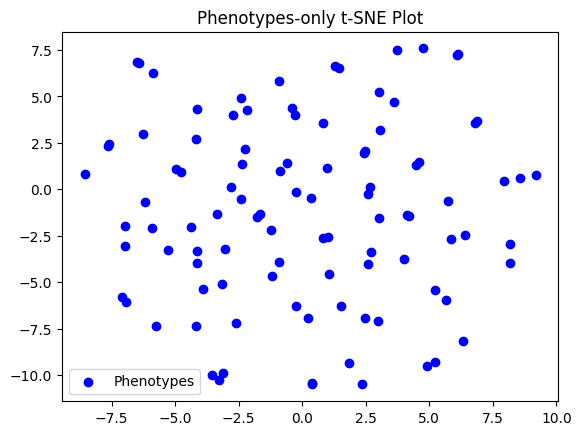

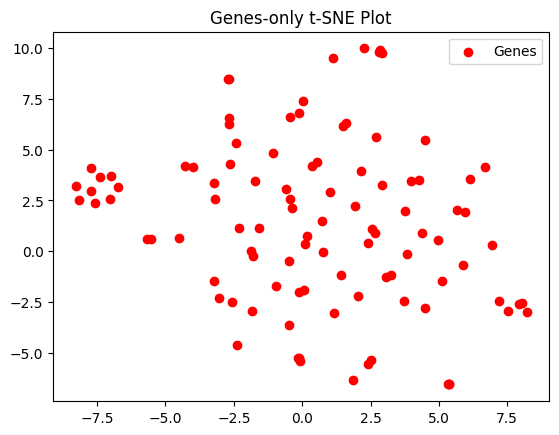

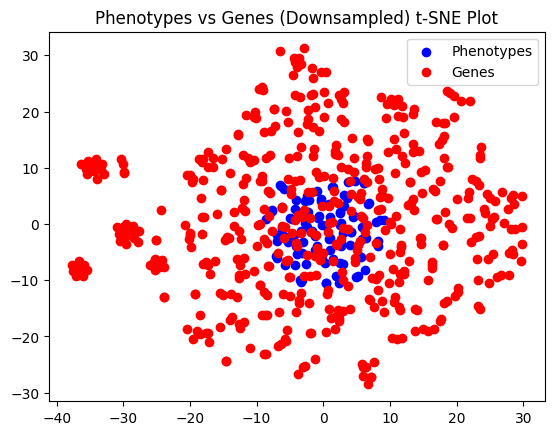

In [19]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import random

# Assuming phenotype_embeddings_np and gene_embeddings_np are already NumPy arrays

# Step 1: Separate Visualizations for Genes and Phenotypes
def plot_embeddings(embeds_2d, labels, colors, title):
    for embed, label, color in zip(embeds_2d, labels, colors):
        plt.scatter(embed[:, 0], embed[:, 1], c=color, label=label)

    plt.legend()
    plt.title(title)
    plt.show()

# Step 2: Downsample Gene Embeddings (if needed)
def downsample_embeddings(embeddings, target_size):
    if len(embeddings) > target_size:
        indices = random.sample(range(len(embeddings)), target_size)
        return embeddings[indices]
    return embeddings

# Plotting phenotypes-only
# tsne = TSNE(n_components=2, random_state=42, perplexity=30)  # Adjust perplexity if needed
# phenotype_embeds_2d = tsne.fit_transform(phenotype_embeddings_np)
plot_embeddings([phenotype_embeds_2d], ['Phenotypes'], ['blue'], "Phenotypes-only t-SNE Plot")

# Plotting genes-only
# gene_embeds_2d = tsne.fit_transform(gene_embeddings_np)
plot_embeddings([gene_embeds_2d], ['Genes'], ['red'], "Genes-only t-SNE Plot")

# Step 3: Combined Visualization with Downsampling (if gene embeddings are larger)
downsampled_genes = downsample_embeddings(gene_embeddings_np, len(phenotype_embeddings_np))
downsampled_gene_embeds_2d = tsne.fit_transform(downsampled_genes)

# Plotting both with the same number of samples
plot_embeddings([phenotype_embeds_2d, downsampled_gene_embeds_2d],
                ['Phenotypes', 'Genes'],
                ['blue', 'red'],
                "Phenotypes vs Genes (Downsampled) t-SNE Plot")


What We Can Infer:

    *   No Clear Separation: Both t-SNE and PCA show that phenotype and gene embeddings
        are highly mixed, which means these embeddings alone (in their current form) are not providing a strong visual
        indication of causality or clear separability between the two groups.
    *   K-Means Overlap: The K-Means clustering result shows that while some clusters can be identified, they still overlap
        significantly, implying that the embedding space might not represent distinct groupings of phenotypes and genes.

    *Advanced clustering (DBSCAN, GMM) can better capture more nuanced, non-spherical structures, which may exist between phenotypes and genes.
    *Feature engineering can introduce new dimensions that highlight important differences between the groups, potentially aiding in separation.
    *UMAP may preserve more of the global structure, potentially leading to better separation than t-SNE.
    *Distance-based analysis can quantitatively evaluate how closely phenotypes and their causal genes are embedded, offering more interpretability than purely visual methods.
    *Supervised learning can provide a clear metric (accuracy, F1-score) to evaluate whether the embeddings are meaningful for distinguishing causal vs. non-causal pairs.

In [20]:
from sklearn.metrics import silhouette_score

# Silhouette score for K-Means clusters
phenotype_silhouette_kmeans = silhouette_score(phenotype_embeds_2d, phenotype_kmeans_clusters)
gene_silhouette_kmeans = silhouette_score(gene_embeds_2d, gene_kmeans_clusters)

print(f"Silhouette Score for Phenotype Clusters (K-Means): {phenotype_silhouette_kmeans}")
print(f"Silhouette Score for Gene Clusters (K-Means): {gene_silhouette_kmeans}")


Silhouette Score for Phenotype Clusters (K-Means): 0.3140370845794678
Silhouette Score for Gene Clusters (K-Means): 0.3764932155609131


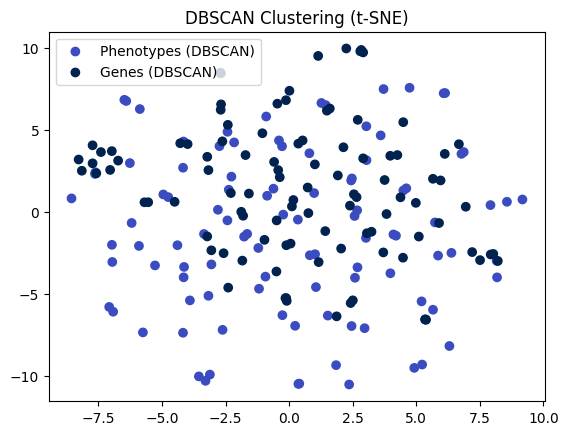

Number of noise points in Phenotype DBSCAN: 100
Number of noise points in Gene DBSCAN: 100


In [21]:
# Plot DBSCAN clustering results on t-SNE
plt.scatter(phenotype_embeds_2d[:, 0], phenotype_embeds_2d[:, 1], c=phenotype_dbscan_clusters, cmap='coolwarm', label='Phenotypes (DBSCAN)')
plt.scatter(gene_embeds_2d[:, 0], gene_embeds_2d[:, 1], c=gene_dbscan_clusters, cmap='cividis', label='Genes (DBSCAN)')
plt.title('DBSCAN Clustering (t-SNE)')
plt.legend()
plt.show()

# Print out number of noise points
phenotype_noise_points = len(phenotype_dbscan_clusters[phenotype_dbscan_clusters == -1])
gene_noise_points = len(gene_dbscan_clusters[gene_dbscan_clusters == -1])

print(f"Number of noise points in Phenotype DBSCAN: {phenotype_noise_points}")
print(f"Number of noise points in Gene DBSCAN: {gene_noise_points}")


In [22]:
# Threshold for considering close relationships
threshold = 0.5  # Adjust this based on the data scale

# Find the closest gene-phenotype pairs
close_pairs = np.where(distances < threshold)
phenotype_indices = close_pairs[0]
gene_indices = close_pairs[1]

print(f"Number of close phenotype-gene pairs: {len(phenotype_indices)}")
# If you want to print specific indices and distances:
for p, g in zip(phenotype_indices, gene_indices):
    print(f"Phenotype {p} is close to Gene {g} with distance {distances[p, g]:.4f}")


Number of close phenotype-gene pairs: 1452
Phenotype 0 is close to Gene 2800 with distance 0.0000
Phenotype 1 is close to Gene 3764 with distance 0.4966
Phenotype 1 is close to Gene 5952 with distance 0.0000
Phenotype 2 is close to Gene 6977 with distance 0.0000
Phenotype 3 is close to Gene 2696 with distance 0.0000
Phenotype 4 is close to Gene 5254 with distance 0.0000
Phenotype 5 is close to Gene 1965 with distance 0.0000
Phenotype 6 is close to Gene 4983 with distance 0.0000
Phenotype 7 is close to Gene 900 with distance 0.0000
Phenotype 8 is close to Gene 7831 with distance 0.0000
Phenotype 8 is close to Gene 10659 with distance 0.4837
Phenotype 9 is close to Gene 2045 with distance 0.0000
Phenotype 10 is close to Gene 4507 with distance 0.0000
Phenotype 10 is close to Gene 8981 with distance 0.4631
Phenotype 11 is close to Gene 666 with distance 0.0000
Phenotype 12 is close to Gene 129 with distance 0.4857
Phenotype 12 is close to Gene 1348 with distance 0.4925
Phenotype 12 is clo

In [23]:
from scipy.spatial import procrustes

# Perform Procrustes analysis between t-SNE and PCA for phenotypes
_, _, procrustes_phenotypes = procrustes(phenotype_embeds_2d, pca_phenotypes)

# Perform Procrustes analysis between t-SNE and PCA for genes
_, _, procrustes_genes = procrustes(gene_embeds_2d, pca_genes)

print(f"Procrustes Similarity for Phenotypes (t-SNE vs PCA): {procrustes_phenotypes}")
print(f"Procrustes Similarity for Genes (t-SNE vs PCA): {procrustes_genes}")


ValueError: Input matrices must be of same shape